In [1]:
%cd ..

C:\Users\Test\Geoalert\aeronetlib\aeronet_raster


# Numpy Adapter

In [3]:
from aeronet_raster.dataadapters import numpyadapter
from matplotlib import pyplot as plt
import numpy as np

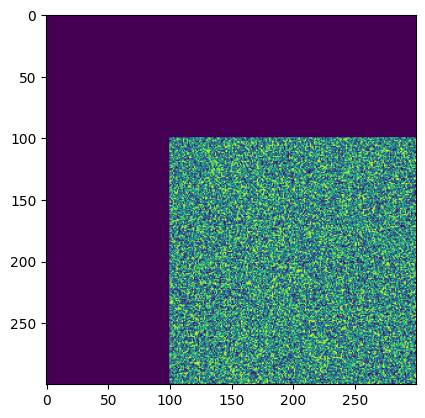

In [5]:
d = numpyadapter.NumpyAdapter(np.random.rand(256, 256))  # create adapter that wraps numy array
plt.imshow(d[-100:200, -100:200])  # read from out-of-bounds

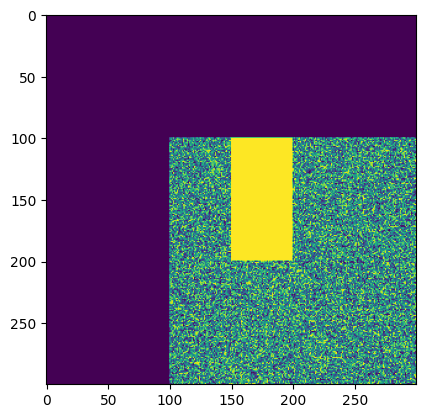

In [8]:
d[-10:100, 50:100] = np.ones((110, 50))  # write into out-of-bounds
plt.imshow(d[-100:200, -100:200])

# Pillow Image

In [13]:
from aeronet_raster.dataadapters import piladapter
from matplotlib import pyplot as plt

<module 'aeronet_raster.dataadapters.piladapter' from 'C:\\Users\\Test\\Geoalert\\aeronetlib\\aeronet_raster\\aeronet_raster\\dataadapters\\piladapter.py'>

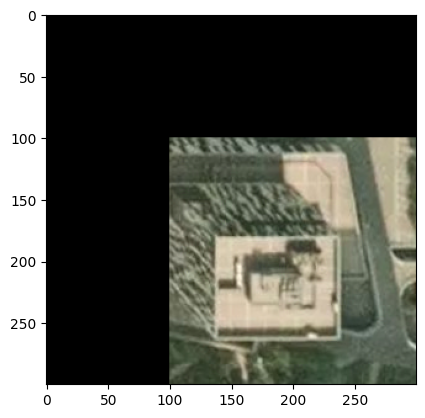

In [14]:
# reading from out of bounds
d = piladapter.PilAdapter('test/unit/test_data/image.png')
d.open()
plt.imshow(d[:, -100:200, -100:200].transpose(1, 2, 0))
d.close()

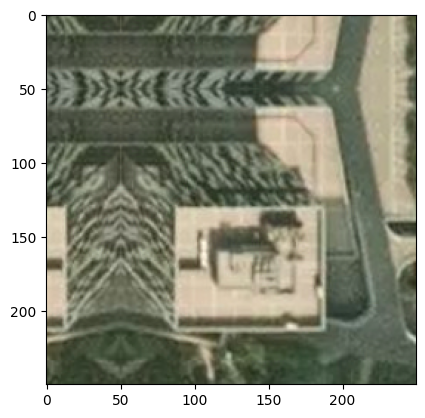

In [17]:
# as a context manager and with reflect padding
with piladapter.PilAdapter('test/unit/test_data/image.png', padding_mode='reflect') as d:
    plt.imshow(d[:, -50:200, -50:200].transpose(1, 2, 0))

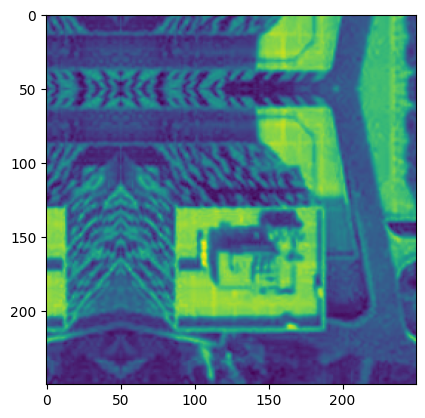

In [18]:
# reading single channel
with piladapter.PilAdapter('test/unit/test_data/image.png', padding_mode='reflect') as d:
    plt.imshow(d[0, -50:200, -50:200][0])

# Rasterio single file

In [19]:
from aeronet_raster.dataadapters import rasterioadapter
from matplotlib import pyplot as plt

(3, 250, 250)


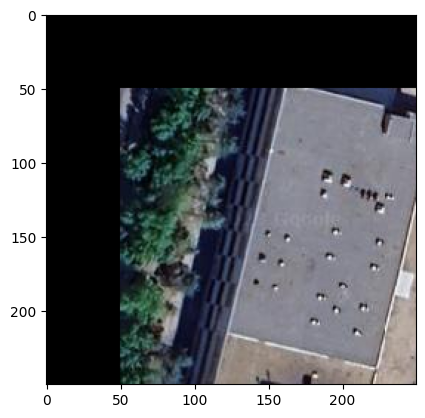

In [32]:
# read
with rasterioadapter.RasterioAdapter('test/unit/test_data/input.tif') as d:
    data = d[:, -50:200, -50:200]
    print(data.shape)
    profile = d.profile
    plt.imshow(data.transpose(1, 2, 0))

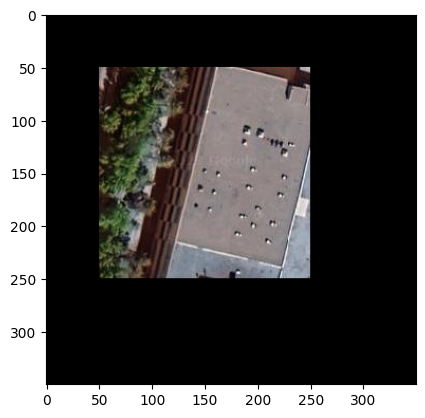

In [34]:
# write
with rasterioadapter.RasterioAdapter('test/unit/test_data/output.tif', 'w', profile) as d:
    d[:, -50:200, -50:200] = data[::-1]  # write channels backwards

with rasterioadapter.RasterioAdapter('test/unit/test_data/output.tif') as d:  # check
    plt.imshow(d[:, -50:300, -50:300].transpose(1, 2, 0))

# Two images stacked (e.g. rgb and mask)

In [28]:
from aeronet_raster.dataadapters import separatebandsadapter, piladapter
from matplotlib import pyplot as plt
import importlib
importlib.reload(piladapter)
importlib.reload(separatebandsadapter)


<module 'aeronet_raster.dataadapters.separatebandsadapter' from 'C:\\Users\\Test\\Geoalert\\aeronetlib\\aeronet_raster\\aeronet_raster\\dataadapters\\separatebandsadapter.py'>

(6, 512, 512)


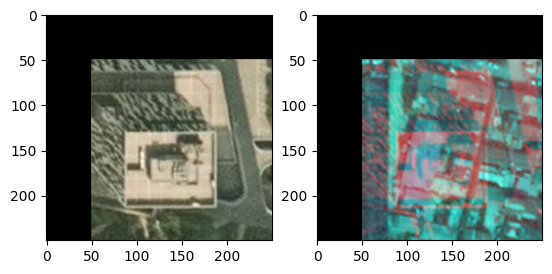

In [29]:
with separatebandsadapter.SeparateBandsAdapter([piladapter.PilAdapter(b) for b in ('test/unit/test_data/image.png',
                                                                                   'test/unit/test_data/image2.png')]) as d:
    print(d.shape)  # since image.png and image2.png both have 3 channels, resulting file will have 6 channels
    _, ax = plt.subplots(ncols=2)
    ax[0].imshow(d[:3, -50:200, -50:200].transpose(1, 2, 0))  # channels 0:3 (first image)
    ax[1].imshow(d[2:5, -50:200, -50:200].transpose(1, 2, 0))  # channels 2:5

# Separate geotiff bands

In [15]:
from aeronet_raster.dataadapters import separatebandsadapter, rasterioadapter
from matplotlib import pyplot as plt

(3, 3428, 3429)
(3, 500, 500)


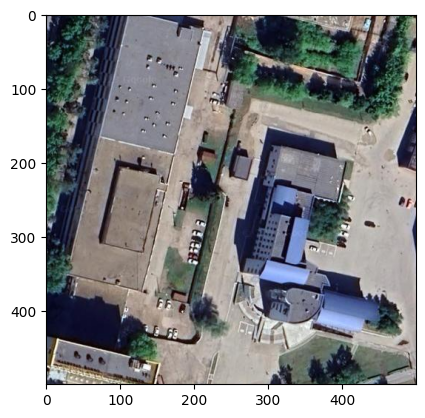

In [35]:
# read
with separatebandsadapter.from_rasterio_bands(('test/unit/test_data/RED.tif',
                                               'test/unit/test_data/GRN.tif',
                                               'test/unit/test_data/BLU.tif')) as d:
    print(d.shape)
    profile = d._data[0].profile
    data = d[:, :500, :500]
    print(data.shape)
    plt.imshow(data.transpose(1, 2, 0))


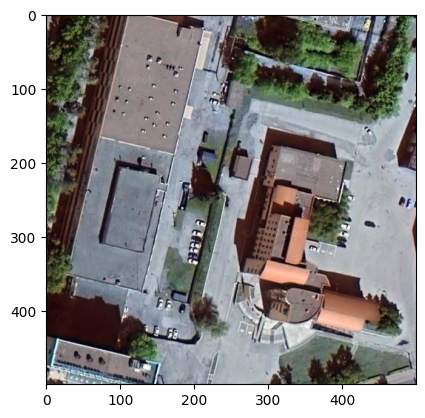

In [36]:
# write
with separatebandsadapter.from_rasterio_bands(('test/unit/test_data/RED_out.tif',
                                               'test/unit/test_data/GRN_out.tif',
                                               'test/unit/test_data/BLU_out.tif'), 'w', profile) as d:
    d[:, :500, :500] = data[::-1]  # write channels backwards


with separatebandsadapter.from_rasterio_bands(('test/unit/test_data/RED_out.tif',
                                               'test/unit/test_data/GRN_out.tif',
                                               'test/unit/test_data/BLU_out.tif')) as d:
    plt.imshow(d[:, :500, :500].transpose(1, 2, 0))